# Wrangling NFI Raw Data


## 📜 Libraries and Functions


In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import random

# Data visualisation
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import f

# My functions
import sys

sys.path.insert(0, "../../src")
from run_mp import *
from utilities import *
from random_forest_utils import *

# Other
from os import error
import datetime
from io import StringIO
import re
import warnings
import chime
from pyprojroot import here

chime.theme("mario")

# Magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
nfi_raw = pd.read_feather(here("data/tmp/nfi/nfi_ready_for_analysis.feather"))
nfi_raw.shape

(549255, 193)

In [3]:
group = split_df_into_list_of_group_or_ns(nfi_raw, "idp")
len(group)

40231

In [4]:
ngroup = 1410
group[ngroup][["idp", "tree_id", "tree_state_change", "ba_1", "ba_2"]].sort_values(
    "tree_state_change"
)

,idp,tree_id,tree_state_change,ba_1,ba_2
7741,518730,518730_15,alive_alive,6.955091,8.403984
7725,518730,518730_1,alive_cut,1.013212,1.042191
7745,518730,518730_21,alive_cut,1.660046,NaN
7744,518730,518730_20,alive_cut,0.525249,NaN
7742,518730,518730_18,alive_cut,0.441355,NaN
7740,518730,518730_14,alive_cut,1.363378,NaN
7739,518730,518730_12,alive_cut,0.340844,NaN
7737,518730,518730_6,alive_cut,0.273972,NaN
7746,518730,518730_22,alive_cut,0.295453,NaN
7735,518730,518730_2,alive_cut,1.270973,NaN


In [76]:
%%timeit -n 5 -r 25
nfi_raw[nfi_raw['tree_state_1'] != 'dead']

335 ms ± 2.97 ms per loop (mean ± std. dev. of 25 runs, 5 loops each)


In [71]:
%%timeit -n 5 -r 25
nfi_raw.query('tree_state_1 != "dead"')

343 ms ± 6.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [83]:
# For every tree_state_class, give me the number of NAs in v
nfi_raw[["v", "tree_state_change"]].groupby("tree_state_change").apply(
    lambda x: x.isna().sum()
)

,v,tree_state_change
tree_state_change,,
alive_alive,0,0
alive_cut,0,0
alive_dead,0,0
dead_cut,0,0
dead_dead,0,0
new_alive,20626,0


In [66]:
%%timeit
calculate_growth_mortality(group[ngroup]).sort_index(axis=1)

92.2 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
# %%timeit
calculate_growth_mortality_optimized(group[ngroup])

,idp,n_plots,n_a1,n_a2,n_aa,n_ad,n_ac,n_na,ba_ax_v1,ba_ax_v2,...,grwt_tot_ba_yr,grwt_tot_ba_prc_yr,grwt_tot_ba_prc_yr_hos,grwt_sur_ba_yr,grwt_sur_ba_prc_yr,grwt_sur_ba_prc_yr_hos,grwt_rec_ba_yr,grwt_rec_ba_prc_yr,change_tot_ba_yr,change_tot_ba_prc_yr
0,518730,1,21.0,1.0,1.0,0.0,20.0,0.0,28.198901,8.403984,...,0.289779,4.166424,3.784639,0.289779,4.166424,3.784639,0.0,0.0,-3.958983,-14.039495


In [33]:
from utilities import calculate_growth_mortality_optimized
from utilities import calculate_growth_mortality

print("Original Function")
df_org = run_mp(
    calculate_growth_mortality,
    group[:100],
    combine_func=pd.concat,
    progress_bar=True,
    num_cores=10,
)

display(df_org.head())

print("Optimized Function")
df_opt = run_mp(
    calculate_growth_mortality_optimized,
    group[:100],
    combine_func=pd.concat,
    progress_bar=True,
    num_cores=10,
)

display(df_opt.head())

Original Function


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:15<00:00,  6.32it/s]


,idp,n_plots,n_ini,n_ini_withcuts,n_sur,n_fin,n_rec,n_die,n_cut,ba_at_v1_of_alive_trees,...,mort_ba_prc_yr_v2,rec_stems_prc_yr_hoshino,tot_growth_ba_prc_yr_hoshino,sur_growth_ba_prc_yr_hoshino,tot_growth_ba_yr,sur_growth_ba_yr,tot_growth_ba_prc_yr,sur_growth_ba_prc_yr,cut_ba_yr_v1,cut_ba_prc_yr_v1
0,500002,1,10,10,10,10,0,0,0,88.080937,...,0.000000,0.000000,1.466279,1.466279,1.340033,1.340033,1.521366,1.521366,0.000000,0.000000
0,500008,1,13,13,13,16,3,0,0,5.952012,...,0.000000,4.152787,9.999074,8.474552,0.772148,0.628110,12.972899,10.552908,0.000000,0.000000
0,500012,1,15,15,15,15,0,0,0,48.118241,...,0.000000,0.000000,2.177601,2.177601,1.106995,1.106995,2.300572,2.300572,0.000000,0.000000
0,500013,1,15,18,14,16,1,1,3,44.747488,...,0.473083,2.670628,1.362266,1.258782,0.595688,0.548999,1.409731,1.299239,0.279241,0.624038
0,500042,1,5,5,5,5,0,0,0,49.129021,...,0.000000,0.000000,1.610637,1.610637,0.824025,0.824025,1.677267,1.677267,0.000000,0.000000


Optimized Function


100%|██████████| 100/100 [00:15<00:00,  6.56it/s]


,idp,n_plots,n_a1,n_a2,n_aa,n_ad,n_ac,n_na,ba_ax_v1,ba_ax_v2,...,grwt_tot_ba_yr,grwt_tot_ba_prc_yr,grwt_tot_ba_prc_yr_hos,grwt_sur_ba_yr,grwt_sur_ba_prc_yr,grwt_sur_ba_prc_yr_hos,grwt_rec_ba_yr,grwt_rec_ba_prc_yr,change_tot_ba_yr,change_tot_ba_prc_yr
0,500002,1,10.0,10.0,10.0,0.0,0.0,0.0,88.080937,94.781104,...,1.340033,1.521366,1.466279,1.340033,1.521366,1.466279,0.000000,0.000000,1.340033,1.521366
0,500008,1,13.0,16.0,13.0,0.0,0.0,3.0,5.952012,9.812754,...,0.772148,12.972899,9.999074,0.628110,10.552908,8.474552,0.144038,2.419992,0.772148,12.972899
0,500012,1,15.0,15.0,15.0,0.0,0.0,0.0,48.118241,53.653214,...,1.106995,2.300572,2.177601,1.106995,2.300572,2.177601,0.000000,0.000000,1.106995,2.300572
0,500013,1,18.0,15.0,14.0,1.0,3.0,1.0,44.747488,45.233829,...,0.595688,1.409731,1.362266,0.548999,1.299239,1.258782,0.046689,0.110492,0.097268,0.217372
0,500042,1,5.0,5.0,5.0,0.0,0.0,0.0,49.129021,53.249145,...,0.824025,1.677267,1.610637,0.824025,1.677267,1.610637,0.000000,0.000000,0.824025,1.677267


---


In [65]:
df_org == df_opt

ValueError: Can only compare identically-labeled (both index and columns) DataFrame objects

## Load NFI Data


In [4]:
# Load NFI Data
if "nfi_raw" not in globals():
    nfi_raw = get_latest_nfi_raw_data()

    # nfi_raw = pd.read_csv(
    #     f"../00_process_nfi_data/{nfi_file_name}",
    #     index_col=[0],
    #     low_memory=False,
    # )

# Get df to change
nfi_final_data = nfi_raw.copy()

# Get variable information from excel sheet
sheet_nfi_org = pd.concat(
    [
        get_feature_database_sheet("NFI Original Variables"),
        get_feature_database_sheet("NFI Derivatives"),
    ]
)

# Fixing specific variables by hand -------------------------------------------
# Replace where integr is in [4L, 6A, 6H] with [4, 6, 6]
nfi_final_data["integr"] = (
    nfi_final_data["integr"].astype(str).replace(["4L", "6A", "6H"], ["4", "6", "6"])
)

# Fix order of, 0 is lowest and 1 is highest, 4 second lowest)
nfi_final_data["dc_1"] = nfi_final_data["dc_1"].replace(
    [0, 1, 2, 3, 4], [0, 4, 3, 2, 1]
)
nfi_final_data["dc_2"] = nfi_final_data["dc_2"].replace(
    [0, 1, 2, 3, 4], [0, 4, 3, 2, 1]
)

# For dep, remove leading 0s
nfi_final_data["dep"] = (
    nfi_final_data["dep"].astype(str).replace(r"^0+", "", regex=True)
)

# For tpespar1_1, remove leading 0s
nfi_final_data["tpespar1_1"] = (
    nfi_final_data["tpespar1_1"].astype(str).replace(r"^0+", "", regex=True)
)

# Fix variable formatting and do gapfilling of categorical variables ----------
vec_cats = []
vec_ords = []
vec_dates = []
vec_nums = []

for col in sorted(nfi_final_data.columns):
    if col in sheet_nfi_org["var"].tolist():
        if sheet_nfi_org.query(f"var == @col")["type"].iloc[0] == "cat":
            # Fix weird behaviour of some values being x and x.0
            nfi_final_data[col] = (
                nfi_final_data[col].astype(str).replace(r"\.0", "", regex=True)
            )
            # Gapfilling missing values
            nfi_final_data[col] = nfi_final_data[col].replace("nan", "Missing")
            # Set to category
            nfi_final_data[col] = nfi_final_data[col].astype("category")
            vec_cats.append(col)

        elif sheet_nfi_org.query(f"var == @col")["type"].iloc[0] == "date":
            nfi_final_data[col] = pd.to_datetime(nfi_final_data[col], errors="coerce")
            vec_dates.append(col)

        elif sheet_nfi_org.query(f"var == @col")["type"].iloc[0] == "ord":
            # nfi_final_data[col] = nfi_final_data[col].fillna(-9999)
            vec_ords.append(col)

        else:
            nfi_final_data[col] = pd.to_numeric(nfi_final_data[col], errors="coerce")
            vec_nums.append(col)


# Print information ----------------------------------------------------------
print("\n --- Variable Encoding: ---")
print(f" - Set to category (plus setting NA to 'missing'): \t{vec_cats}")
print(f" - Set to ordinal (plus setting NA to -9999): \t\t{vec_ords}")
print(f" - Set to datetime: \t\t\t\t\t{vec_dates}")
print(f" - Set to numeric: \t\t\t\t\t{vec_nums}")

print("Shape of nfi_final_data:", nfi_final_data.shape)
print("Number of invidiual sites:", nfi_final_data["idp"].nunique())

print("\n --- Columns in nfi_final_data: ----")
for col in nfi_final_data.columns:
    print(f" - {col}")

👉 Latest file is /Users/pascal/repos/padasch/ifn_analysis/data/tmp/20231201-103525_nfi_dataset_raw.csv 
👉 Created on Friday 2023-12-01, 10:36 which is 34 days ago.


/Users/pascal/repos/padasch/ifn_analysis/python/00_process_nfi_data/../../src/utilities.py:90: DtypeWarning: Columns (20,31,42,45,48,51,112,118,119,122,133,134,135,136,149,150,151,152,167,168,169,170,173,174,176,180,186,188,192,194,202,218,219,220,221,223,247,248,251,252,253,256,257,258,260,261) have mixed types. Specify dtype option on import or set low_memory=False.
  nfi_data_raw = pd.read_csv(latest_file, index_col=0)



 --- Variable Encoding: ---
 - Set to category (plus setting NA to 'missing'): 	['a', 'acces', 'acci', 'alive_but_injured_1', 'alive_but_injured_2', 'andain', 'autut_1', 'autut_2', 'bois_1', 'bois_2', 'bord', 'cible', 'clon', 'cover_change', 'csa_1', 'csa_2', 'cslisi', 'dcespar1', 'dcespar2', 'decoupe', 'deggib', 'dep', 'dom_nr1_tree_class_fct', 'dom_nr2_tree_class_fct', 'dom_nr3_tree_class_fct', 'dom_rest_tree_class_fct', 'entp', 'espar', 'espar_red', 'family_lat', 'forme', 'genus_lat', 'gre', 'human_activity_var', 'humus', 'idp', 'instp5', 'integr', 'iti', 'land_use', 'land_use_change', 'mode_of_death', 'nincid_1', 'nincid_2', 'obschemin', 'obsdate', 'obshydr', 'obspedo', 'obsprof', 'obsriv', 'obsriv2', 'obsroc', 'obstopo', 'obsveget', 'ofr', 'oh', 'oln', 'olt', 'olv', 'order_lat', 'ori', 'p1525', 'p7ares', 'peupnr_1', 'peupnr_2', 'qualite', 'revisit_state', 'roche', 'ser', 'sfcoeur', 'sfdorge_1', 'sfdorge_2', 'sfo', 'sfpied', 'shadow_growth', 'simplif', 'species_lat', 'strate', 'sv

## Split tree and site variables


In [5]:
# Get NFI variables that are on the tree level
tree_vars = (
    get_feature_database_sheet("NFI Original Variables")
    .query("level == 'tree'")["var"]
    .tolist()
)

site_vars = (
    get_feature_database_sheet("NFI Original Variables")
    .query("level == 'location'")["var"]
    .tolist()
)

# Make sure idp is in there and remove duplicates through set
tree_vars = list(set(["idp", "tree_id", "campagne_1"] + tree_vars))
site_vars = list(set(["idp", "campagne_1"] + site_vars))

# TODO: ADDING VARIABLES HERE THAT SHOULD BE ADDED SEPARATELY WHEN MOVING FROM R TO PYTHON
site_vars = site_vars + ["lat_fr", "lon_fr", "lat", "lon"]
tree_vars = tree_vars + [
    "tree_state_1",
    "tree_state_2",
    "tree_state_change",
    "species_lat",
    "genus_lat",
    "espar_red",
    "shadow_growth",
    "tree_class",
    "family_lat",
    "order_lat",
]

# Subset vars that are actually in the data (removing automatically added _1 _2 suffixes)
tree_vars = [x for x in tree_vars if x in nfi_final_data.columns]
site_vars = [x for x in site_vars if x in nfi_final_data.columns]

# Separate tree and location variables
nfi_tree_raw = nfi_final_data[tree_vars].reset_index(drop=True)
nfi_site_raw = nfi_final_data[site_vars].drop_duplicates().reset_index(drop=True)

# Move idp to first position
nfi_tree_raw.insert(0, "idp", nfi_tree_raw.pop("idp"))
nfi_site_raw.insert(0, "idp", nfi_site_raw.pop("idp"))

# Report shapes
print("\n --- Tree Variables ---")
print(f" - Number of variables: {len(tree_vars)}")
print(f" - Number of observations: {nfi_tree_raw.shape[0]}")
print(f" - Number of unique trees: {nfi_tree_raw['tree_id'].nunique()}")
print(f" - Number of unique sites: {nfi_tree_raw['idp'].nunique()}")
print("\n --- Site Variables ---")
print(f" - Number of variables: {len(site_vars)}")
print(f" - Number of observations: {nfi_site_raw.shape[0]}")
print(f" - Number of unique sites: {nfi_site_raw['idp'].nunique()}")


 --- Tree Variables ---
 - Number of variables: 59
 - Number of observations: 1318400
 - Number of unique trees: 1318400
 - Number of unique sites: 102924

 --- Site Variables ---
 - Number of variables: 119
 - Number of observations: 104554
 - Number of unique sites: 102924


In [6]:
# Raw data has site duplicates that need to be cleaned up
# Set idp to integer for easier handling
nfi_site_raw["idp"] = nfi_site_raw["idp"].astype("int32")
# Get idp duplicates
idp_dupes = (
    nfi_site_raw[nfi_site_raw.duplicated("idp", keep=False)]
    .sort_values("idp")
    .replace("Missing", np.nan)
)


# Define function to merge
def merge_rows(group):
    merged_values = []

    for col in group.columns:
        unique_values = group[col].dropna().unique()

        if len(unique_values) == 0:
            merged_values.append(pd.NA)
        elif len(unique_values) > 1:
            print(
                f"\nWarning: Multiple non-NA values in {col} for Group {group['idp'].iloc[0]} - Values: {unique_values} - Chosen value: {unique_values[0]} ",
            )
            merged_values.append(unique_values[0])
        else:
            merged_values.append(unique_values[0])

    return pd.Series(merged_values, index=group.columns)


# Apply function
idp_dupes_cleaned = idp_dupes.groupby("idp").apply(merge_rows).reset_index(drop=True)
nfi_site_nodupes = nfi_site_raw[~nfi_site_raw["idp"].isin(idp_dupes["idp"])]
nfi_site_nodupes = pd.concat([nfi_site_nodupes, idp_dupes_cleaned]).reset_index(
    drop=True
)
# Check if done correctly
print(f" - Number of unique sites: {nfi_site_nodupes['idp'].nunique()}")
print(f" - Number of observations: {nfi_site_nodupes.shape[0]}")
# Set idp back to category
nfi_site_nodupes["idp"] = nfi_site_nodupes["idp"].astype("category")

 - Number of unique sites: 102924
 - Number of observations: 102924


### Add Tree Growth


In [7]:
# Set growth threshold below which ba_1 and ba_2 are set to NA
growth_threshold = -5  # percentage

In [13]:
# NEW DF
nfi_tree_growth = nfi_tree_raw.copy()

# DBH, BA, CHANGE -------------------------------------------------------------
# Get plot area
plot_area = 25**2 * np.pi / 10**5  # (25m)^2 * pi / 10000 [m^2/ha] = [ha]

# C13
nfi_tree_growth["c13_change_abs_yr"] = (
    nfi_tree_growth["c13_2"] - nfi_tree_growth["c13_1"]
) / 5
nfi_tree_growth["c13_change_perc_yr"] = (
    nfi_tree_growth["c13_change_abs_yr"] / nfi_tree_growth["c13_1"] * 100
)

# For trees with unrealistic growth, set c13_2 to NA
# Print number of trees with unrealistic growth
df_trees_unreal_growth = nfi_tree_growth.query("c13_change_perc_yr < @growth_threshold")
df_trees_real_growth = nfi_tree_growth.query("c13_change_perc_yr >= @growth_threshold")
ntrees_unrealistic_growth = df_trees_unreal_growth.shape[0]
ptrees_unrealistic_growth = round(
    ntrees_unrealistic_growth / nfi_tree_growth.shape[0] * 100
)

print(
    f" - Number of trees with growth less than {growth_threshold}%: {ntrees_unrealistic_growth} ({ptrees_unrealistic_growth}%)",
    f"\n   For these, c13_1 and c13_2 are set to NA❗",
)

# Set c13_1, c13_2 and c13_change_perc_yr to NA if growth is below threshold
nfi_tree_growth.loc[
    nfi_tree_growth["c13_change_abs_yr"] < growth_threshold, "c13_1"
] = np.nan
nfi_tree_growth.loc[
    nfi_tree_growth["c13_change_abs_yr"] < growth_threshold, "c13_2"
] = np.nan
nfi_tree_growth.loc[
    nfi_tree_growth["c13_change_abs_yr"] < growth_threshold, "c13_change_perc_yr"
] = np.nan

# Diameter
nfi_tree_growth["dbh_1"] = nfi_tree_growth["c13_1"] / np.pi
nfi_tree_growth["dbh_2"] = nfi_tree_growth["c13_2"] / np.pi
nfi_tree_growth["dbh_change_abs_yr"] = (
    nfi_tree_growth["dbh_2"] - nfi_tree_growth["dbh_1"]
) / 5
nfi_tree_growth["dbh_change_perc_yr"] = (
    nfi_tree_growth["dbh_change_abs_yr"] / nfi_tree_growth["dbh_1"] * 100
)

# Basal Area
nfi_tree_growth["ba_1"] = np.pi * (nfi_tree_growth["dbh_1"] / 2) ** 2 / plot_area
nfi_tree_growth["ba_2"] = np.pi * (nfi_tree_growth["dbh_2"] / 2) ** 2 / plot_area
nfi_tree_growth["ba_change_abs_yr"] = (
    nfi_tree_growth["ba_2"] - nfi_tree_growth["ba_1"]
) / 5
nfi_tree_growth["ba_change_perc_yr"] = (
    nfi_tree_growth["ba_change_abs_yr"] / nfi_tree_growth["ba_1"] * 100
)

# Growth rates
nfi_tree_growth["avg_growth_height_meter_per_yr"] = (
    nfi_tree_growth["htot"] / nfi_tree_growth["age13"]
)
nfi_tree_growth["avg_growth_ba_per_year"] = (
    nfi_tree_growth["ba_1"] / nfi_tree_growth["age13"]
)

# Replace inf with NA
nfi_tree_growth = nfi_tree_growth.replace([np.inf, -np.inf], np.nan)

 - Number of trees with growth less than -5%: 181 (0%) 
   For these, c13_1 and c13_2 are set to NA❗


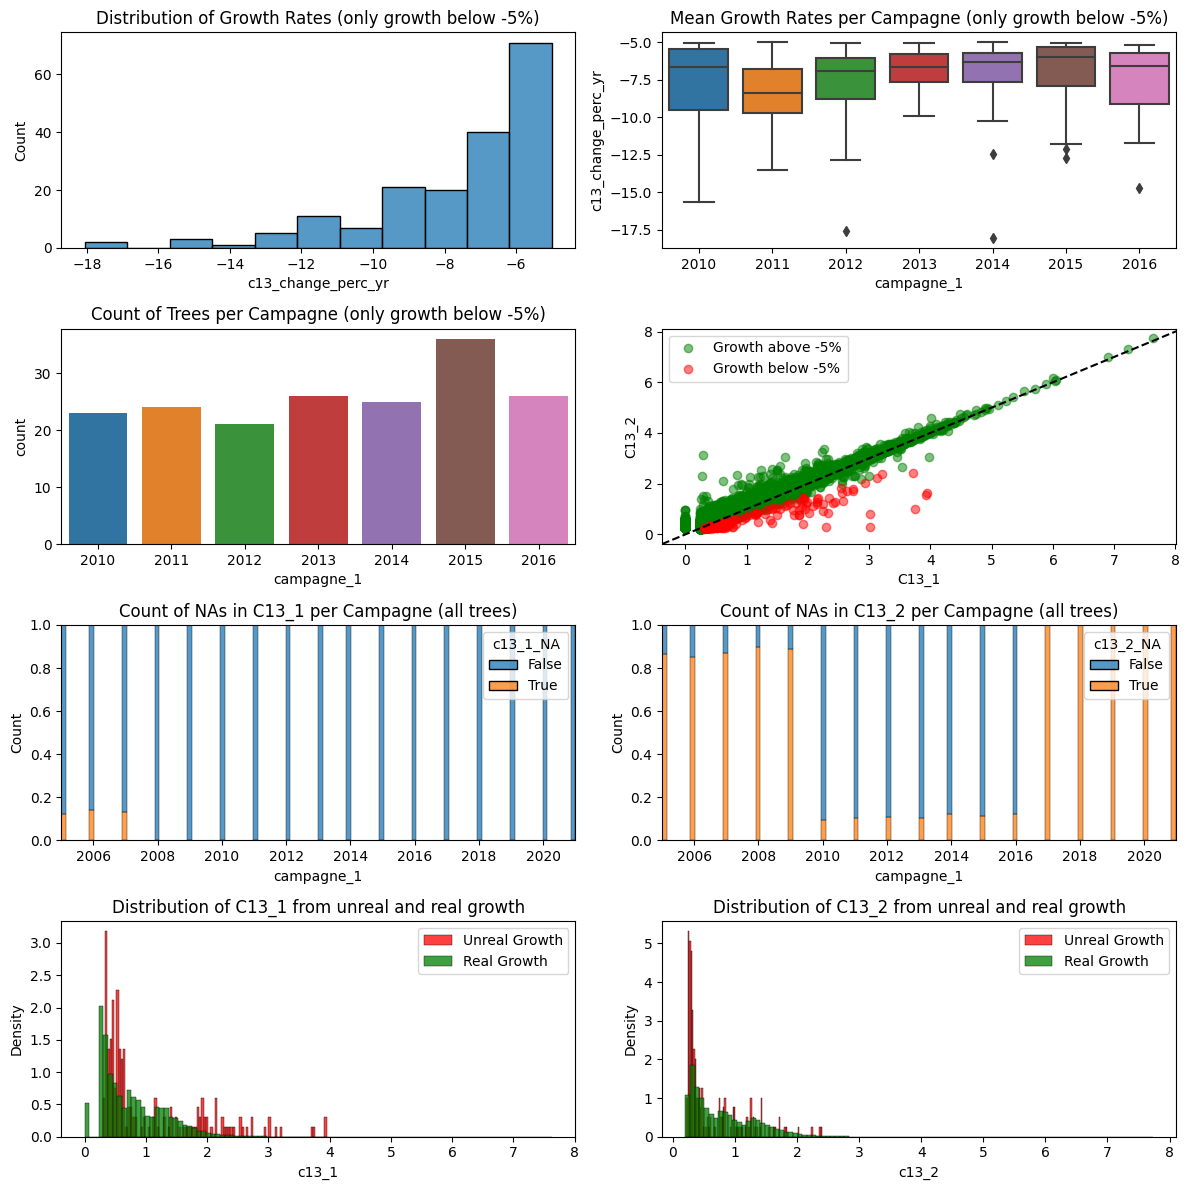

In [9]:
# INFORMATION ON UNREALISTIC GROWTH -------------------------------------------
# Create a 2x2 plot grid
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

# Plot distribution of growth rates
sns.histplot(df_trees_unreal_growth["c13_change_perc_yr"], ax=axs[0, 0], stat="count")
axs[0, 0].set_title(
    f"Distribution of Growth Rates (only growth below {growth_threshold}%)"
)

# Plot the mean per campagne as boxplot
sns.boxplot(
    x="campagne_1", y="c13_change_perc_yr", data=df_trees_unreal_growth, ax=axs[0, 1]
)
axs[0, 1].set_title(
    f"Mean Growth Rates per Campagne (only growth below {growth_threshold}%)"
)

# Add count on top of boxplot
sns.countplot(x="campagne_1", data=df_trees_unreal_growth, ax=axs[1, 0])
axs[1, 0].set_title(
    f"Count of Trees per Campagne (only growth below {growth_threshold}%)"
)

# Compare C13_1 and C13_2
axs[1, 1].scatter(
    df_trees_real_growth["c13_1"],
    df_trees_real_growth["c13_2"],
    color="green",
    label=f"Growth above {growth_threshold}%",
    alpha=0.5,
)
axs[1, 1].scatter(
    df_trees_unreal_growth["c13_1"],
    df_trees_unreal_growth["c13_2"],
    color="red",
    label=f"Growth below {growth_threshold}%",
    alpha=0.5,
)
axs[1, 1].set_xlabel("C13_1")
axs[1, 1].set_ylabel("C13_2")
axs[1, 1].legend()
axs[1, 1].axline((0, 0), slope=1, color="black", linestyle="--")

# Get counts of NAs in C13_1 and C13_2 per campagne
df_tmp = nfi_tree_growth.copy()
df_tmp["c13_1_NA"] = df_tmp["c13_1"].isna()
df_tmp["c13_2_NA"] = df_tmp["c13_2"].isna()

# Plot these counts per campagne
sns.histplot(
    x="campagne_1",
    hue="c13_1_NA",
    data=df_tmp,
    ax=axs[2, 0],
    multiple="fill",
    stat="count",
)

axs[2, 0].set_title(f"Count of NAs in C13_1 per Campagne (all trees)")

sns.histplot(
    x="campagne_1",
    hue="c13_2_NA",
    data=df_tmp,
    ax=axs[2, 1],
    multiple="fill",
    stat="count",
)
axs[2, 1].set_title(f"Count of NAs in C13_2 per Campagne (all trees)")


# Plot distribution of c13_1 in df_trees_unreal_growth
sns.histplot(
    df_trees_unreal_growth["c13_1"], stat="density", color="red", bins=100, ax=axs[3, 0]
)
sns.histplot(
    df_trees_real_growth["c13_1"], stat="density", color="green", bins=100, ax=axs[3, 0]
)
axs[3, 0].set_title("Distribution of C13_1 from unreal and real growth")
axs[3, 0].legend(["Unreal Growth", "Real Growth"])

# Plot distribution of c13_2 in df_trees_unreal_growth
sns.histplot(
    df_trees_unreal_growth["c13_2"], stat="density", color="red", bins=100, ax=axs[3, 1]
)
sns.histplot(
    df_trees_real_growth["c13_2"], stat="density", color="green", bins=100, ax=axs[3, 1]
)
axs[3, 1].set_title("Distribution of C13_2 from unreal and real growth")
axs[3, 1].legend(["Unreal Growth", "Real Growth"])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

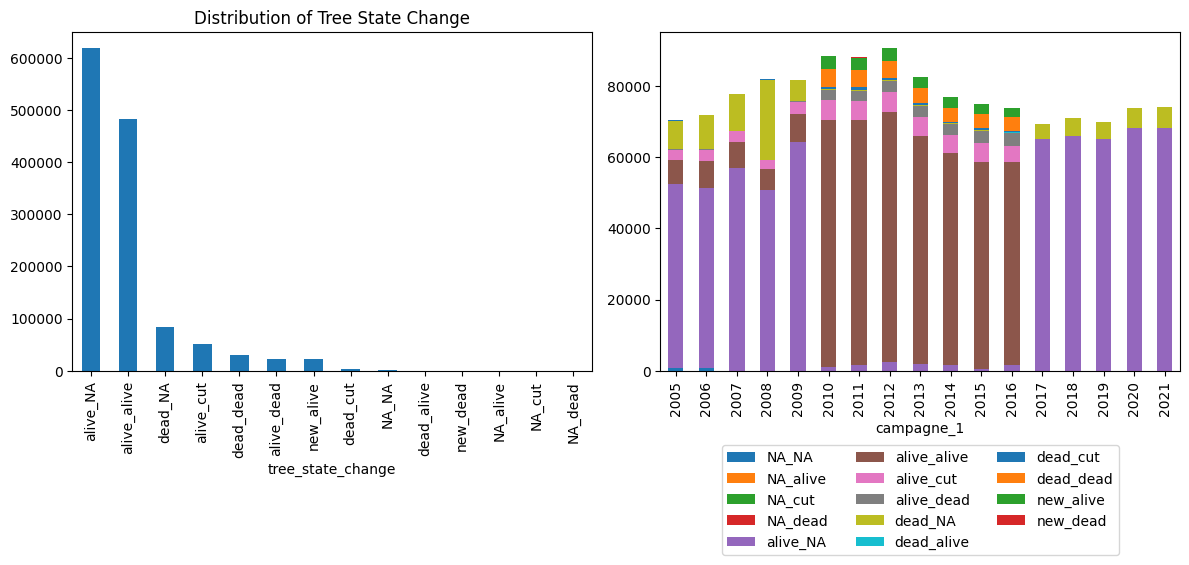

In [196]:
# INFORMATION ON TREE STATE ----------------------------------------------------
# Drop tree_state_change without any counts
nfi_tree_growth["tree_state_change"] = (
    nfi_tree_growth["tree_state_change"].astype(str).astype("category")
)

# Create a 2x1 plot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Distribution of tree_state_change
nfi_tree_growth["tree_state_change"].value_counts().plot(kind="bar", ax=axs[0])
axs[0].set_title("Distribution of Tree State Change")

(
    nfi_tree_growth.groupby(["tree_state_change", "campagne_1"])
    .size()
    .reset_index()
    .pivot(columns="tree_state_change", index="campagne_1", values=0)
    .plot(kind="bar", stacked=True, ax=axs[1])
)
axs[1].legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)

fig.tight_layout()
plt.show()

### Apriori Filter of Sites and Trees

Notes on the filters below:

- Filters to apply to reduce computational load + get more representative results when calculating site-level metrics.
- Between 2009-2016, peupnr_2 is never 3 (temporarily forested). So, filtering for peupnr_2 =! 3 does not remove any clear-cut sites.


In [12]:
# SITE FILTER
df_aft = nfi_site_nodupes.copy()

# Filter for campagne of interest
df_bef = df_aft.copy()
df_aft = df_bef.query("campagne_1 > 2009 and campagne_1 < 2017")
filter_report("campagne_1 2010-2016", df_bef, df_aft, site_level=True)

# Filter based on peupnr_x (0 = censusable, 1 = not censusable, 3 = temporarily deforested)
df_bef = df_aft.copy()
df_aft = df_bef.query("peupnr_1 not in ['1', '3']")
filter_report("Censuable sites (peupnr_1)", df_bef, df_aft, site_level=True)

df_bef = df_aft.copy()
df_aft = df_bef.query("peupnr_2 not in ['1', '3']")
filter_report("Censuable sites (peupnr_2)", df_bef, df_aft, site_level=True)

# Removing NA coords lat/lon
df_bef = df_aft.copy()
df_aft = df_bef.dropna(subset=["lat", "lon"])
filter_report("Coordinates not NA", df_bef, df_aft, site_level=True)

# Final Report
nfi_site_filtered = df_aft.reset_index(drop=True)
filter_report("-- Final", nfi_site_nodupes, nfi_site_filtered, site_level=True)

# Reset dtypes to remove dropped levels
nfi_site_filtered["peupnr_1"] = nfi_site_filtered["peupnr_1"].astype("category")
nfi_site_filtered["peupnr_2"] = nfi_site_filtered["peupnr_2"].astype("category")

 - Filter: campagne_1 2010-2016           |	Sites from 102924 to 42672 (=      60252, 59%)	|	 ❗More than 5% of sites removed❗
 - Filter: Censuable sites (peupnr_1)     |	Sites from 42672 to 42117 (=        555, 1%)	|	 
 - Filter: Censuable sites (peupnr_2)     |	Sites from 42117 to 41456 (=        661, 2%)	|	 
 - Filter: Coordinates not NA             |	Sites from 41456 to 41296 (=        160, 0%)	|	 
 - Filter: -- Final                       |	Sites from 102924 to 41296 (=      61628, 60%)	|	 ❗More than 5% of sites removed❗


In [ ]:
# SITE FILTER
df_aft = nfi_site_nodupes.copy()

# Filter for campagne of interest
df_bef = df_aft.copy()
df_aft = df_bef.query("campagne_1 > 2009 and campagne_1 < 2017")
filter_report("campagne_1 2010-2016", df_bef, df_aft, site_level=True)

# Filter based on peupnr_x (0 = censusable, 1 = not censusable, 3 = temporarily deforested)
df_bef = df_aft.copy()
df_aft = df_bef.query("peupnr_1 not in ['1', '3']")
filter_report("Censuable sites (peupnr_1)", df_bef, df_aft, site_level=True)

df_bef = df_aft.copy()
df_aft = df_bef.query("peupnr_2 not in ['1', '3']")
filter_report("Censuable sites (peupnr_2)", df_bef, df_aft, site_level=True)

# Removing NA coords lat/lon
df_bef = df_aft.copy()
df_aft = df_bef.dropna(subset=["lat", "lon"])
filter_report("Coordinates not NA", df_bef, df_aft, site_level=True)

# Final Report
nfi_site_filtered = df_aft.reset_index(drop=True)
filter_report("-- Final", nfi_site_nodupes, nfi_site_filtered, site_level=True)

# Reset dtypes to remove dropped levels
nfi_site_filtered["peupnr_1"] = nfi_site_filtered["peupnr_1"].astype("category")
nfi_site_filtered["peupnr_2"] = nfi_site_filtered["peupnr_2"].astype("category")

 - Filter: campagne_1 2010-2016           |	Sites from 102924 to 42672 (=      60252, 59%)	|	 ❗More than 5% of sites removed❗
 - Filter: Censuable sites (peupnr_1)     |	Sites from 42672 to 42117 (=        555, 1%)	|	 
 - Filter: Censuable sites (peupnr_2)     |	Sites from 42117 to 41456 (=        661, 2%)	|	 
 - Filter: Coordinates not NA             |	Sites from 41456 to 41296 (=        160, 0%)	|	 
 - Filter: -- Final                       |	Sites from 102924 to 41296 (=      61628, 60%)	|	 ❗More than 5% of sites removed❗


### Save Coordinates for Extraction


In [ ]:
#
# ! Note: Save the idp, census year, and coordinates for these sites. This file is then used for all extractions! Filters down the line, may remove some sites, but keeping them in here makes it more flexible for a general data extraction without going back-and-forth again.
# first_year, SiteID, x, y, idp

sites_with_idp = (
    nfi_site_filtered[["idp", "campagne_1", "lat", "lon", "lat_fr", "lon_fr"]]
    .drop_duplicates()
    .reset_index()
)

sites_with_idp.columns = ["SiteID", "idp", "first_year", "y", "x", "y_fr", "x_fr"]

sites_without_idp = (
    sites_with_idp.copy()
    .drop(["idp", "first_year", "SiteID"], axis=1)
    .drop_duplicates()
    .reset_index()
    .rename(columns={"index": "SiteID"})
)

sites_with_idp.to_csv("nfi_final_sites.csv", index=False)
sites_without_idp.to_csv("nfi_final_sites_without_idp.csv", index=False)

In [16]:
# TREE FILTER
# New df
df_bef = nfi_tree_growth.copy()

# Reduce to idp that are in nfi_site_filtered
nfi_site_nodupes["idp"] = nfi_site_nodupes["idp"].astype(int)

df_bef["idp"] = df_bef["idp"].astype(int)
df_aft = df_bef[df_bef["idp"].isin(nfi_site_filtered["idp"].tolist())]
filter_report("Reduce to idp in nfi_site_filtered", df_bef, df_aft)

# Remove where shadow growth is 'yes'
df_bef = df_aft.copy()
df_aft = df_bef.query("shadow_growth != 'yes'")
filter_report("Remove trees wi. shadow growth", df_bef, df_aft)

# Remove trees with unknown tree status
df_bef = df_aft.copy()
df_aft = df_bef.query("tree_state_1 != 'Missing'")
filter_report("Remove tree_state_1 missing", df_bef, df_aft)

df_bef = df_aft.copy()
df_aft = df_bef.query("tree_state_2 != 'Missing'")
filter_report("Remove tree_state_2 missing", df_bef, df_aft)

# Remove trees with non-sensical tree state change
df_bef = df_aft.copy()
df_aft = df_bef.query("tree_state_change != 'dead_alive'")
filter_report("Remove state_change dead_alive", df_bef, df_aft)

# Remove recruits that died
df_bef = df_aft.copy()
df_aft = df_bef.query("tree_state_change != 'new_dead'")
filter_report("Remove state_change new_dead", df_bef, df_aft)

# Remove trees that were certainly outside of the target stand
df_bef = df_aft.copy()
df_aft = df_bef.query("cible != '0'")
filter_report("Remove cible", df_bef, df_aft)

# Remove trees with simplified measurement
df_bef = df_aft.copy()
df_aft = df_bef.query("simplif != '1'")
filter_report("Remove simplified trees", df_bef, df_aft)

# Final Report
nfi_filter_trees = df_aft.reset_index(drop=True)
filter_report("-- Final", nfi_tree_growth, nfi_filter_trees)

# Reset dtypes to remove dropped levels
nfi_filter_trees["shadow_growth"] = nfi_filter_trees[
    "shadow_growth"
].cat.remove_unused_categories()
nfi_filter_trees["tree_state_1"] = nfi_filter_trees[
    "tree_state_1"
].cat.remove_unused_categories()
nfi_filter_trees["tree_state_2"] = nfi_filter_trees[
    "tree_state_2"
].cat.remove_unused_categories()
nfi_filter_trees["tree_state_change"] = nfi_filter_trees[
    "tree_state_change"
].cat.remove_unused_categories()

 - Filter: Reduce to idp in nfi_site_filtered |	Sites from 102924 to 41296 (=      61628, 60%)	|	 Trees from 1318400 to 565220 (= 753180, 57%) ❗More than 5% of sites removed❗ ❗More than 5% of trees removed❗
 - Filter: Remove trees wi. shadow growth |	Sites from 41296 to 41296 (=          0, 0%)	|	 Trees from 565220 to 565220 (=     0, 0%)  
 - Filter: Remove tree_state_1 missing    |	Sites from 41296 to 41296 (=          0, 0%)	|	 Trees from 565220 to 565220 (=     0, 0%)  
 - Filter: Remove tree_state_2 missing    |	Sites from 41296 to 40307 (=        989, 2%)	|	 Trees from 565220 to 553390 (= 11830, 2%)  
 - Filter: Remove state_change dead_alive |	Sites from 40307 to 40305 (=          2, 0%)	|	 Trees from 553390 to 553141 (=   249, 0%)  
 - Filter: Remove state_change new_dead   |	Sites from 40305 to 40305 (=          0, 0%)	|	 Trees from 553141 to 552995 (=   146, 0%)  
 - Filter: Remove cible                   |	Sites from 40305 to 40231 (=         74, 0%)	|	 Trees from 552995 to 

In [50]:
# Reduce sites only to sites that were kept after filtering trees
nfi_site_filtered = nfi_site_filtered[
    nfi_site_filtered["idp"].isin(nfi_filter_trees["idp"].unique())
].reset_index(drop=True)

nfi_site_filtered.shape

(40221, 119)

### Additional Information


#### Tree-level


In [62]:
nfi_tree_addinfo = nfi_filter_trees.copy()

In [63]:
# HEIGHT CLASS ----------------------------------------------------------------
nfi_tree_addinfo["tree_height_class"] = (
    pd.cut(
        nfi_tree_addinfo["htot"],
        bins=[0, 10, 15, 20, 25, np.Inf],
        labels=["0-10", "10-15", "15-20", "20-25", "25+"],
    )
    .cat.add_categories("Missing")
    .fillna("Missing")
)

# AGE CLASS -------------------------------------------------------------------
nfi_tree_addinfo["tree_age_class"] = (
    pd.cut(
        nfi_tree_addinfo["age13"],
        bins=[0, 15, 30, 45, 60, 75, 100, np.Inf],
        labels=["0-15", "15-30", "30-45", "45-60", "60-75", "75-100", "100+"],
    )
    .cat.add_categories("Missing")
    .fillna("Missing")
)

In [65]:
nfi_tree_addinfo

,idp,a,tetard,qualite,ddec,tree_id,q1,hdec,veget5,veget,...,dbh_change_abs_yr,dbh_change_perc_yr,ba_1,ba_2,ba_change_abs_yr,ba_change_perc_yr,avg_growth_height_meter_per_yr,avg_growth_ba_per_year,tree_height_class,tree_age_class
0,632691,3,Missing,Missing,NaN,632691_3,0.0,10.8,M,0,...,0.000115,0.046154,2.465752,2.477146,0.002279,0.092414,NaN,NaN,15-20,Missing
1,632691,1,Missing,S1,NaN,632691_1,0.0,18.4,0,0,...,0.013369,2.625000,10.375289,13.277533,0.580449,5.594531,0.830769,0.39905,20-25,15-30
2,632691,2,Missing,S1,NaN,632691_2,0.0,13.0,0,0,...,0.004456,1.794872,2.465752,2.928182,0.092486,3.750822,NaN,NaN,15-20,Missing
3,632691,4,Missing,S1,NaN,632691_4,0.0,10.4,0,0,...,0.000637,0.215054,3.505308,3.581096,0.015158,0.432420,NaN,NaN,10-15,Missing
4,632691,5,Missing,S+,NaN,632691_5,0.0,21.0,0,0,...,0.007639,2.000000,5.836100,7.061681,0.245116,4.200000,NaN,NaN,20-25,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365363,1131437,11,0,Missing,NaN,1131437_11,NaN,3.8,M,0,...,-0.000064,-0.068966,0.340844,0.338498,-0.000469,-0.137693,NaN,NaN,10-15,Missing
365364,1131437,14,0,S2,NaN,1131437_14,NaN,14.6,0,0,...,0.002292,0.986301,2.159762,2.378032,0.043654,2.021242,NaN,NaN,15-20,Missing
365365,1131437,15,0,Missing,NaN,1131437_15,NaN,11.9,0,0,...,0.000191,0.150000,0.648456,0.658219,0.001953,0.301125,NaN,NaN,10-15,Missing
365366,1131437,16,0,BI,0.39,1131437_16,NaN,6.4,0,0,...,0.000700,0.169231,6.849312,6.965714,0.023280,0.339893,NaN,NaN,15-20,Missing


#### Site-level


In [187]:
# TODO: Add information like human activity and stuff here
nfi_site_addinfo = nfi_site_filtered.copy()

In [188]:
# ADD INFORMATION ON GRECO AND SER --------------------------------------------
# ! I am matching all regional information using the noisy coordinates to keep this consistent. But this should be corrected later on using the true coordinates.

# Multiprocess to add regional information
df_list = split_df_into_list_of_group_or_ns(nfi_site_addinfo, 10)
nfi_site_addinfo = run_mp(attach_regional_information, df_list, pd.concat, num_cores=10)

Splitting df into 10 random groups


100%|██████████| 10/10 [01:50<00:00, 11.03s/it]


❌ TODO: Add some data exploration here


<Axes: >

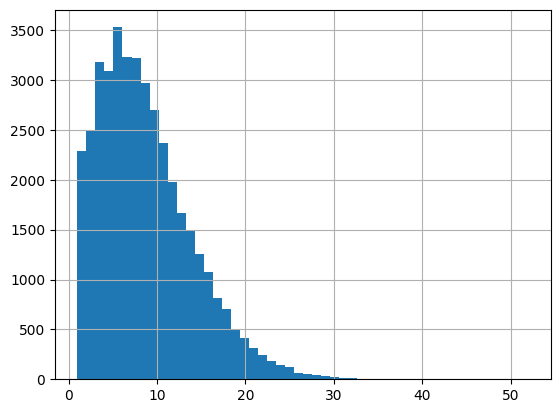

In [67]:
# What is the distribution of number of trees per site?
nfi_tree_addinfo.groupby("idp").size().hist(bins=50)

<Axes: xlabel='n_trees', ylabel='mean_dbh'>

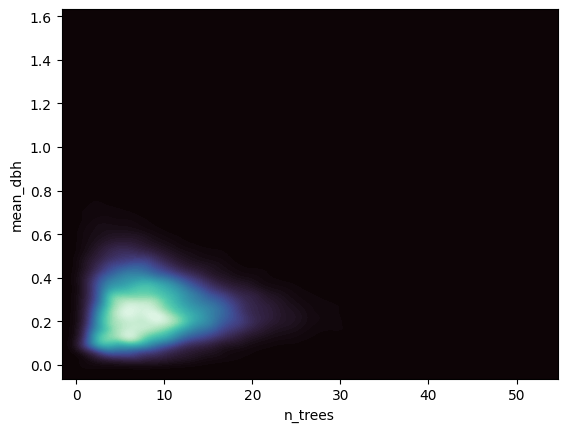

In [75]:
# How does the number of trees per site change with the mean dbh per site?
df_tmp = nfi_tree_addinfo.groupby("idp").agg({"dbh_1": "mean", "idp": "size"})
df_tmp.columns = ["mean_dbh", "n_trees"]
# Make smooth scatterplot
sns.kdeplot(
    data=df_tmp, y="mean_dbh", x="n_trees", cmap="mako", thresh=0, levels=100, fill=True
)

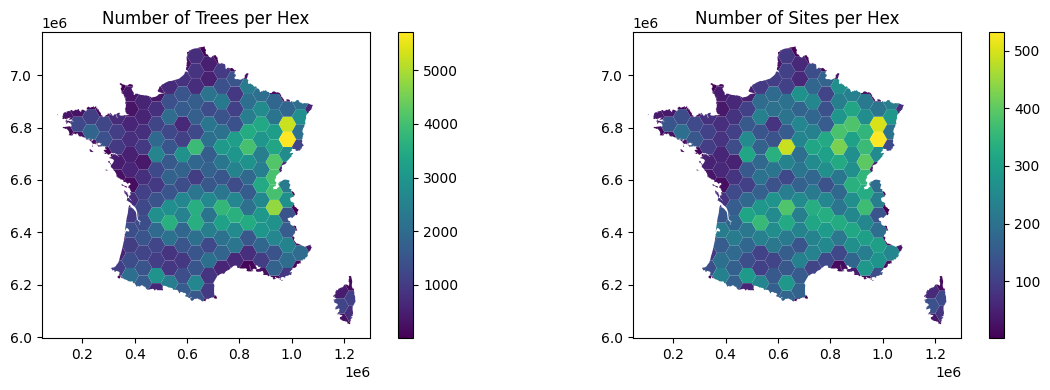

In [228]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Attach site data to have information on hex
df_tmp = pd.merge(nfi_tree_addinfo, nfi_site_addinfo, how="left")

# Group by hex and get number of trees per group
df_tmp_trees = df_tmp.groupby("hex").size().reset_index()
df_tmp_trees.columns = ["hex", "n_trees"]

# Attach hex shapefile
df_tmp_trees = pd.merge(df_tmp_trees, shp_hex, how="right")

# Group by hex and get number of sites per group
df_tmp_sites = nfi_site_addinfo.groupby("hex").size().reset_index()
df_tmp_sites.columns = ["hex", "n_sites"]

# Attach hex shapefile
df_tmp_sites = pd.merge(df_tmp_sites, shp_hex, how="right")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot geometry filled with n_trees on the first subplot
gpd.GeoDataFrame(df_tmp_trees).plot(column="n_trees", legend=True, ax=axs[0])
axs[0].set_title("Number of Trees per Hex")

# Plot geometry filled with n_sites on the second subplot
gpd.GeoDataFrame(df_tmp_sites).plot(column="n_sites", legend=True, ax=axs[1])
axs[1].set_title("Number of Sites per Hex")

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Calculate Mortality and Growth

**For Temporal Analysis:**

- To calculate the mean change of a region, I have to calculate at the SITE-LEVEL for:

  - All trees
  - For 10 most common species
  - For all height classes
  - For all age classes
  - Then aggregate to desired spatial and temporal level

- To calculate the total change of a region, I have to calculate at the REGION-YEAR-LEVEL for:

  - All trees
  - For 10 most common species
  - For all height classes
  - For all age classes

**For RF Analysis:**


In [259]:
# Merge tree and site data
df_merged = pd.merge(nfi_tree_addinfo, nfi_site_addinfo, how="left")

### Directly at area-level


In [392]:
# Calculate metrics of change at region-level
all_regions = ["idp", "reg", "dep", "gre", "ser", "hex"]
all_species = ["all"] + df_merged["genus_lat"].value_counts().head(10).index.tolist()
all_heights = ["all"] + df_merged["tree_height_class"].value_counts().index.tolist()
all_heights.remove("Missing")

from utilities import calculate_growth_mortality
from run_mp import run_mp

df_in = df_merged.copy()
group_per_height = True

for my_species in all_species:
    for my_height in all_heights:
        # Get new df
        df_loop = df_in.copy()
        # Filter for species
        if my_species != "all":
            df_loop = df_loop.query(f"genus_lat == '{my_species}'")
        # Filter for height
        if my_height != "all":
            df_loop = df_loop.query(f"tree_height_class == '{my_height}'")

        for my_region in all_regions:
            my_file = str.lower(
                f"species_{my_species}__tree_heights_{my_height}__area_{my_region}"
            )

            print(str.lower(f"\n - Working on: {my_file}"))

            my_region_tmp = my_region

            # IDP holds year information, so no need to add there
            # But grouping for other regions need this information
            if my_region != "idp":
                my_region = my_region + "_year"
                df_loop[my_region] = (
                    df_loop[my_region_tmp].astype(str)
                    + "_"
                    + df_loop["campagne_1"].astype(str)
                )

            # Create list and run mp
            df_list = [
                group for name, group in df_loop.groupby(my_region, as_index=False)
            ]
            df_mp = run_mp(
                calculate_growth_mortality,
                df_list,
                combine_func=pd.concat,
                progress_bar=True,
                num_cores=10,
                min_trees_per_plot=1,
                grouping_variable=my_region,
            )

            # Save df
            my_dir = here(str.lower(f"data/tmp/dfs_metrics_of_change/area-level/"))
            if not os.path.exists(my_dir):
                os.makedirs(my_dir)
            df_mp.reset_index(drop=True).to_feather(f"{my_dir}/{my_file}.feather")


 - working on: species_all__tree_heights_all__area_idp


100%|██████████| 40221/40221 [1:31:39<00:00,  7.31it/s]  



 - working on: species_all__tree_heights_all__area_reg


100%|██████████| 91/91 [00:17<00:00,  5.13it/s]



 - working on: species_all__tree_heights_all__area_dep


100%|██████████| 649/649 [01:37<00:00,  6.63it/s]



 - working on: species_all__tree_heights_all__area_gre


100%|██████████| 77/77 [00:14<00:00,  5.22it/s]



 - working on: species_all__tree_heights_all__area_ser


100%|██████████| 602/602 [01:28<00:00,  6.79it/s]



 - working on: species_all__tree_heights_all__area_hex


100%|██████████| 1582/1582 [03:47<00:00,  6.95it/s]



 - working on: species_all__tree_heights_10-15__area_idp


100%|██████████| 26627/26627 [1:02:45<00:00,  7.07it/s]



 - working on: species_all__tree_heights_10-15__area_reg


100%|██████████| 91/91 [00:15<00:00,  5.97it/s]



 - working on: species_all__tree_heights_10-15__area_dep


100%|██████████| 645/645 [01:34<00:00,  6.81it/s]



 - working on: species_all__tree_heights_10-15__area_gre


100%|██████████| 77/77 [00:12<00:00,  5.95it/s]



 - working on: species_all__tree_heights_10-15__area_ser


100%|██████████| 602/602 [01:25<00:00,  7.04it/s]



 - working on: species_all__tree_heights_10-15__area_hex


100%|██████████| 1545/1545 [03:47<00:00,  6.79it/s]



 - working on: species_all__tree_heights_0-10__area_idp


100%|██████████| 25799/25799 [58:33<00:00,  7.34it/s] 



 - working on: species_all__tree_heights_0-10__area_reg


100%|██████████| 91/91 [00:15<00:00,  6.01it/s]



 - working on: species_all__tree_heights_0-10__area_dep


100%|██████████| 644/644 [01:33<00:00,  6.90it/s]



 - working on: species_all__tree_heights_0-10__area_gre


100%|██████████| 77/77 [00:13<00:00,  5.52it/s]



 - working on: species_all__tree_heights_0-10__area_ser


100%|██████████| 602/602 [01:27<00:00,  6.90it/s]



 - working on: species_all__tree_heights_0-10__area_hex


100%|██████████| 1555/1555 [03:37<00:00,  7.14it/s]



 - working on: species_all__tree_heights_15-20__area_idp


100%|██████████| 23864/23864 [54:50<00:00,  7.25it/s]



 - working on: species_all__tree_heights_15-20__area_reg


100%|██████████| 91/91 [00:15<00:00,  6.01it/s]



 - working on: species_all__tree_heights_15-20__area_dep


100%|██████████| 647/647 [01:30<00:00,  7.18it/s]



 - working on: species_all__tree_heights_15-20__area_gre


100%|██████████| 77/77 [00:13<00:00,  5.73it/s]



 - working on: species_all__tree_heights_15-20__area_ser


100%|██████████| 600/600 [01:25<00:00,  7.00it/s]



 - working on: species_all__tree_heights_15-20__area_hex


100%|██████████| 1519/1519 [03:27<00:00,  7.30it/s]



 - working on: species_all__tree_heights_20-25__area_idp


100%|██████████| 19992/19992 [45:46<00:00,  7.28it/s]  



 - working on: species_all__tree_heights_20-25__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.21it/s]



 - working on: species_all__tree_heights_20-25__area_dep


100%|██████████| 642/642 [01:29<00:00,  7.13it/s]



 - working on: species_all__tree_heights_20-25__area_gre


100%|██████████| 77/77 [00:13<00:00,  5.72it/s]



 - working on: species_all__tree_heights_20-25__area_ser


100%|██████████| 583/583 [01:21<00:00,  7.15it/s]



 - working on: species_all__tree_heights_20-25__area_hex


100%|██████████| 1453/1453 [03:20<00:00,  7.25it/s]



 - working on: species_all__tree_heights_25+__area_idp


100%|██████████| 13533/13533 [30:31<00:00,  7.39it/s]



 - working on: species_all__tree_heights_25+__area_reg


100%|██████████| 91/91 [00:15<00:00,  6.06it/s]



 - working on: species_all__tree_heights_25+__area_dep


100%|██████████| 627/627 [01:27<00:00,  7.18it/s]



 - working on: species_all__tree_heights_25+__area_gre


100%|██████████| 77/77 [00:13<00:00,  5.90it/s]



 - working on: species_all__tree_heights_25+__area_ser


100%|██████████| 553/553 [01:16<00:00,  7.21it/s]



 - working on: species_all__tree_heights_25+__area_hex


100%|██████████| 1352/1352 [03:04<00:00,  7.33it/s]



 - working on: species_quercus__tree_heights_all__area_idp


100%|██████████| 22898/22898 [49:27<00:00,  7.72it/s]  



 - working on: species_quercus__tree_heights_all__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.32it/s]



 - working on: species_quercus__tree_heights_all__area_dep


100%|██████████| 645/645 [01:24<00:00,  7.60it/s]



 - working on: species_quercus__tree_heights_all__area_gre


100%|██████████| 77/77 [00:12<00:00,  6.03it/s]



 - working on: species_quercus__tree_heights_all__area_ser


100%|██████████| 597/597 [01:17<00:00,  7.67it/s]



 - working on: species_quercus__tree_heights_all__area_hex


100%|██████████| 1504/1504 [03:13<00:00,  7.79it/s]



 - working on: species_quercus__tree_heights_10-15__area_idp


100%|██████████| 7745/7745 [16:33<00:00,  7.80it/s]



 - working on: species_quercus__tree_heights_10-15__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.39it/s]



 - working on: species_quercus__tree_heights_10-15__area_dep


100%|██████████| 624/624 [01:21<00:00,  7.66it/s]



 - working on: species_quercus__tree_heights_10-15__area_gre


100%|██████████| 77/77 [00:12<00:00,  6.36it/s]



 - working on: species_quercus__tree_heights_10-15__area_ser


100%|██████████| 571/571 [01:15<00:00,  7.60it/s]



 - working on: species_quercus__tree_heights_10-15__area_hex


100%|██████████| 1343/1343 [02:53<00:00,  7.75it/s]



 - working on: species_quercus__tree_heights_0-10__area_idp


100%|██████████| 7720/7720 [16:25<00:00,  7.84it/s]



 - working on: species_quercus__tree_heights_0-10__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.49it/s]



 - working on: species_quercus__tree_heights_0-10__area_dep


100%|██████████| 611/611 [01:19<00:00,  7.64it/s]



 - working on: species_quercus__tree_heights_0-10__area_gre


100%|██████████| 77/77 [00:12<00:00,  6.27it/s]



 - working on: species_quercus__tree_heights_0-10__area_ser


100%|██████████| 569/569 [01:15<00:00,  7.50it/s]



 - working on: species_quercus__tree_heights_0-10__area_hex


100%|██████████| 1309/1309 [02:48<00:00,  7.76it/s]



 - working on: species_quercus__tree_heights_15-20__area_idp


100%|██████████| 8722/8722 [18:42<00:00,  7.77it/s]



 - working on: species_quercus__tree_heights_15-20__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.38it/s]



 - working on: species_quercus__tree_heights_15-20__area_dep


100%|██████████| 611/611 [01:20<00:00,  7.57it/s]



 - working on: species_quercus__tree_heights_15-20__area_gre


100%|██████████| 77/77 [00:12<00:00,  6.13it/s]



 - working on: species_quercus__tree_heights_15-20__area_ser


100%|██████████| 563/563 [01:14<00:00,  7.51it/s]



 - working on: species_quercus__tree_heights_15-20__area_hex


100%|██████████| 1314/1314 [02:50<00:00,  7.70it/s]



 - working on: species_quercus__tree_heights_20-25__area_idp


100%|██████████| 8775/8775 [18:58<00:00,  7.71it/s]  



 - working on: species_quercus__tree_heights_20-25__area_reg


100%|██████████| 86/86 [00:13<00:00,  6.39it/s]



 - working on: species_quercus__tree_heights_20-25__area_dep


100%|██████████| 582/582 [01:17<00:00,  7.50it/s]



 - working on: species_quercus__tree_heights_20-25__area_gre


100%|██████████| 73/73 [00:12<00:00,  6.00it/s]



 - working on: species_quercus__tree_heights_20-25__area_ser


100%|██████████| 493/493 [01:05<00:00,  7.47it/s]



 - working on: species_quercus__tree_heights_20-25__area_hex


100%|██████████| 1183/1183 [02:34<00:00,  7.65it/s]



 - working on: species_quercus__tree_heights_25+__area_idp


100%|██████████| 5737/5737 [12:21<00:00,  7.74it/s]



 - working on: species_quercus__tree_heights_25+__area_reg


100%|██████████| 78/78 [00:12<00:00,  6.14it/s]



 - working on: species_quercus__tree_heights_25+__area_dep


100%|██████████| 527/527 [01:09<00:00,  7.55it/s]



 - working on: species_quercus__tree_heights_25+__area_gre


100%|██████████| 64/64 [00:10<00:00,  6.10it/s]



 - working on: species_quercus__tree_heights_25+__area_ser


100%|██████████| 426/426 [00:56<00:00,  7.51it/s]



 - working on: species_quercus__tree_heights_25+__area_hex


100%|██████████| 1014/1014 [02:11<00:00,  7.68it/s]



 - working on: species_pinus__tree_heights_all__area_idp


100%|██████████| 8644/8644 [18:40<00:00,  7.72it/s]



 - working on: species_pinus__tree_heights_all__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.38it/s]



 - working on: species_pinus__tree_heights_all__area_dep


100%|██████████| 598/598 [01:19<00:00,  7.54it/s]



 - working on: species_pinus__tree_heights_all__area_gre


100%|██████████| 77/77 [00:12<00:00,  6.17it/s]



 - working on: species_pinus__tree_heights_all__area_ser


100%|██████████| 541/541 [01:12<00:00,  7.49it/s]



 - working on: species_pinus__tree_heights_all__area_hex


100%|██████████| 1233/1233 [02:41<00:00,  7.65it/s]



 - working on: species_pinus__tree_heights_10-15__area_idp


100%|██████████| 3820/3820 [08:01<00:00,  7.93it/s]



 - working on: species_pinus__tree_heights_10-15__area_reg


100%|██████████| 90/90 [00:13<00:00,  6.48it/s]



 - working on: species_pinus__tree_heights_10-15__area_dep


100%|██████████| 502/502 [01:06<00:00,  7.57it/s]



 - working on: species_pinus__tree_heights_10-15__area_gre


100%|██████████| 77/77 [00:12<00:00,  6.32it/s]



 - working on: species_pinus__tree_heights_10-15__area_ser


100%|██████████| 469/469 [01:01<00:00,  7.60it/s]



 - working on: species_pinus__tree_heights_10-15__area_hex


100%|██████████| 935/935 [02:00<00:00,  7.77it/s]



 - working on: species_pinus__tree_heights_0-10__area_idp


100%|██████████| 3620/3620 [07:45<00:00,  7.78it/s]



 - working on: species_pinus__tree_heights_0-10__area_reg


100%|██████████| 90/90 [00:13<00:00,  6.48it/s]



 - working on: species_pinus__tree_heights_0-10__area_dep


100%|██████████| 473/473 [01:02<00:00,  7.61it/s]



 - working on: species_pinus__tree_heights_0-10__area_gre


100%|██████████| 76/76 [00:12<00:00,  6.31it/s]



 - working on: species_pinus__tree_heights_0-10__area_ser


100%|██████████| 443/443 [00:58<00:00,  7.56it/s]



 - working on: species_pinus__tree_heights_0-10__area_hex


100%|██████████| 828/828 [01:56<00:00,  7.12it/s]



 - working on: species_pinus__tree_heights_15-20__area_idp


100%|██████████| 3512/3512 [07:54<00:00,  7.40it/s]



 - working on: species_pinus__tree_heights_15-20__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.15it/s]



 - working on: species_pinus__tree_heights_15-20__area_dep


100%|██████████| 543/543 [01:14<00:00,  7.27it/s]



 - working on: species_pinus__tree_heights_15-20__area_gre


100%|██████████| 77/77 [00:12<00:00,  5.92it/s]



 - working on: species_pinus__tree_heights_15-20__area_ser


100%|██████████| 472/472 [01:05<00:00,  7.19it/s]



 - working on: species_pinus__tree_heights_15-20__area_hex


100%|██████████| 975/975 [02:18<00:00,  7.03it/s]



 - working on: species_pinus__tree_heights_20-25__area_idp


100%|██████████| 2589/2589 [05:47<00:00,  7.45it/s]



 - working on: species_pinus__tree_heights_20-25__area_reg


100%|██████████| 91/91 [00:15<00:00,  5.84it/s]



 - working on: species_pinus__tree_heights_20-25__area_dep


100%|██████████| 509/509 [01:13<00:00,  6.90it/s]



 - working on: species_pinus__tree_heights_20-25__area_gre


100%|██████████| 77/77 [00:12<00:00,  5.94it/s]



 - working on: species_pinus__tree_heights_20-25__area_ser


100%|██████████| 429/429 [00:59<00:00,  7.15it/s]



 - working on: species_pinus__tree_heights_20-25__area_hex


100%|██████████| 843/843 [01:53<00:00,  7.43it/s]



 - working on: species_pinus__tree_heights_25+__area_idp


100%|██████████| 1097/1097 [02:31<00:00,  7.23it/s]



 - working on: species_pinus__tree_heights_25+__area_reg


100%|██████████| 85/85 [00:14<00:00,  5.67it/s]



 - working on: species_pinus__tree_heights_25+__area_dep


100%|██████████| 348/348 [00:49<00:00,  6.98it/s]



 - working on: species_pinus__tree_heights_25+__area_gre


100%|██████████| 65/65 [00:11<00:00,  5.86it/s]



 - working on: species_pinus__tree_heights_25+__area_ser


100%|██████████| 293/293 [00:41<00:00,  7.06it/s]



 - working on: species_pinus__tree_heights_25+__area_hex


100%|██████████| 525/525 [01:12<00:00,  7.26it/s]



 - working on: species_fagus__tree_heights_all__area_idp


100%|██████████| 8852/8852 [20:03<00:00,  7.36it/s]



 - working on: species_fagus__tree_heights_all__area_reg


100%|██████████| 91/91 [00:15<00:00,  6.05it/s]



 - working on: species_fagus__tree_heights_all__area_dep


100%|██████████| 563/563 [01:18<00:00,  7.16it/s]



 - working on: species_fagus__tree_heights_all__area_gre


100%|██████████| 77/77 [00:13<00:00,  5.87it/s]



 - working on: species_fagus__tree_heights_all__area_ser


100%|██████████| 481/481 [01:08<00:00,  6.98it/s]



 - working on: species_fagus__tree_heights_all__area_hex


100%|██████████| 1114/1114 [02:34<00:00,  7.23it/s]



 - working on: species_fagus__tree_heights_10-15__area_idp


100%|██████████| 3688/3688 [08:14<00:00,  7.46it/s]



 - working on: species_fagus__tree_heights_10-15__area_reg


100%|██████████| 91/91 [00:15<00:00,  5.85it/s]



 - working on: species_fagus__tree_heights_10-15__area_dep


100%|██████████| 511/511 [01:12<00:00,  7.09it/s]



 - working on: species_fagus__tree_heights_10-15__area_gre


100%|██████████| 76/76 [00:12<00:00,  6.00it/s]



 - working on: species_fagus__tree_heights_10-15__area_ser


100%|██████████| 417/417 [00:56<00:00,  7.35it/s]



 - working on: species_fagus__tree_heights_10-15__area_hex


100%|██████████| 903/903 [02:07<00:00,  7.10it/s]



 - working on: species_fagus__tree_heights_0-10__area_idp


100%|██████████| 2730/2730 [06:24<00:00,  7.09it/s]



 - working on: species_fagus__tree_heights_0-10__area_reg


100%|██████████| 89/89 [00:15<00:00,  5.83it/s]



 - working on: species_fagus__tree_heights_0-10__area_dep


100%|██████████| 468/468 [01:09<00:00,  6.75it/s]



 - working on: species_fagus__tree_heights_0-10__area_gre


100%|██████████| 76/76 [00:12<00:00,  5.91it/s]



 - working on: species_fagus__tree_heights_0-10__area_ser


100%|██████████| 386/386 [00:55<00:00,  6.99it/s]



 - working on: species_fagus__tree_heights_0-10__area_hex


100%|██████████| 800/800 [01:51<00:00,  7.18it/s]



 - working on: species_fagus__tree_heights_15-20__area_idp


100%|██████████| 3390/3390 [07:49<00:00,  7.22it/s]



 - working on: species_fagus__tree_heights_15-20__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.23it/s]



 - working on: species_fagus__tree_heights_15-20__area_dep


100%|██████████| 500/500 [01:10<00:00,  7.13it/s]



 - working on: species_fagus__tree_heights_15-20__area_gre


100%|██████████| 73/73 [00:12<00:00,  6.06it/s]



 - working on: species_fagus__tree_heights_15-20__area_ser


100%|██████████| 408/408 [00:57<00:00,  7.12it/s]



 - working on: species_fagus__tree_heights_15-20__area_hex


100%|██████████| 888/888 [02:02<00:00,  7.23it/s]



 - working on: species_fagus__tree_heights_20-25__area_idp


100%|██████████| 3424/3424 [07:49<00:00,  7.29it/s]



 - working on: species_fagus__tree_heights_20-25__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.44it/s]



 - working on: species_fagus__tree_heights_20-25__area_dep


100%|██████████| 486/486 [01:06<00:00,  7.30it/s]



 - working on: species_fagus__tree_heights_20-25__area_gre


100%|██████████| 73/73 [00:12<00:00,  5.92it/s]



 - working on: species_fagus__tree_heights_20-25__area_ser


100%|██████████| 403/403 [00:56<00:00,  7.12it/s]



 - working on: species_fagus__tree_heights_20-25__area_hex


100%|██████████| 873/873 [01:59<00:00,  7.28it/s]



 - working on: species_fagus__tree_heights_25+__area_idp


100%|██████████| 3153/3153 [07:20<00:00,  7.16it/s]



 - working on: species_fagus__tree_heights_25+__area_reg


100%|██████████| 87/87 [00:13<00:00,  6.23it/s]



 - working on: species_fagus__tree_heights_25+__area_dep


100%|██████████| 450/450 [01:03<00:00,  7.06it/s]



 - working on: species_fagus__tree_heights_25+__area_gre


100%|██████████| 70/70 [00:12<00:00,  5.46it/s]



 - working on: species_fagus__tree_heights_25+__area_ser


100%|██████████| 367/367 [00:54<00:00,  6.68it/s]



 - working on: species_fagus__tree_heights_25+__area_hex


100%|██████████| 754/754 [01:51<00:00,  6.74it/s]



 - working on: species_castanea__tree_heights_all__area_idp


100%|██████████| 5111/5111 [11:57<00:00,  7.13it/s]



 - working on: species_castanea__tree_heights_all__area_reg


100%|██████████| 91/91 [00:15<00:00,  5.85it/s]



 - working on: species_castanea__tree_heights_all__area_dep


100%|██████████| 532/532 [01:19<00:00,  6.68it/s]



 - working on: species_castanea__tree_heights_all__area_gre


100%|██████████| 77/77 [00:13<00:00,  5.65it/s]



 - working on: species_castanea__tree_heights_all__area_ser


100%|██████████| 468/468 [01:11<00:00,  6.53it/s]



 - working on: species_castanea__tree_heights_all__area_hex


100%|██████████| 1021/1021 [02:28<00:00,  6.89it/s]



 - working on: species_castanea__tree_heights_10-15__area_idp


100%|██████████| 2670/2670 [06:24<00:00,  6.94it/s]



 - working on: species_castanea__tree_heights_10-15__area_reg


100%|██████████| 87/87 [00:14<00:00,  6.03it/s]



 - working on: species_castanea__tree_heights_10-15__area_dep


100%|██████████| 469/469 [01:08<00:00,  6.86it/s]



 - working on: species_castanea__tree_heights_10-15__area_gre


100%|██████████| 73/73 [00:13<00:00,  5.50it/s]



 - working on: species_castanea__tree_heights_10-15__area_ser


100%|██████████| 397/397 [01:00<00:00,  6.56it/s]



 - working on: species_castanea__tree_heights_10-15__area_hex


100%|██████████| 795/795 [01:56<00:00,  6.84it/s]



 - working on: species_castanea__tree_heights_0-10__area_idp


100%|██████████| 1990/1990 [04:38<00:00,  7.15it/s]



 - working on: species_castanea__tree_heights_0-10__area_reg


100%|██████████| 89/89 [00:14<00:00,  6.02it/s]



 - working on: species_castanea__tree_heights_0-10__area_dep


100%|██████████| 449/449 [01:05<00:00,  6.85it/s]



 - working on: species_castanea__tree_heights_0-10__area_gre


100%|██████████| 73/73 [00:12<00:00,  5.98it/s]



 - working on: species_castanea__tree_heights_0-10__area_ser


100%|██████████| 368/368 [00:54<00:00,  6.71it/s]



 - working on: species_castanea__tree_heights_0-10__area_hex


100%|██████████| 689/689 [01:39<00:00,  6.89it/s]



 - working on: species_castanea__tree_heights_15-20__area_idp


100%|██████████| 2292/2292 [05:12<00:00,  7.34it/s]



 - working on: species_castanea__tree_heights_15-20__area_reg


100%|██████████| 88/88 [00:16<00:00,  5.33it/s]



 - working on: species_castanea__tree_heights_15-20__area_dep


100%|██████████| 456/456 [01:06<00:00,  6.87it/s]



 - working on: species_castanea__tree_heights_15-20__area_gre


100%|██████████| 72/72 [00:12<00:00,  5.95it/s]



 - working on: species_castanea__tree_heights_15-20__area_ser


100%|██████████| 382/382 [00:53<00:00,  7.20it/s]



 - working on: species_castanea__tree_heights_15-20__area_hex


100%|██████████| 758/758 [01:47<00:00,  7.07it/s]



 - working on: species_castanea__tree_heights_20-25__area_idp


100%|██████████| 1250/1250 [02:59<00:00,  6.95it/s]



 - working on: species_castanea__tree_heights_20-25__area_reg


100%|██████████| 84/84 [00:14<00:00,  5.83it/s]



 - working on: species_castanea__tree_heights_20-25__area_dep


100%|██████████| 413/413 [01:00<00:00,  6.85it/s]



 - working on: species_castanea__tree_heights_20-25__area_gre


100%|██████████| 70/70 [00:12<00:00,  5.46it/s]



 - working on: species_castanea__tree_heights_20-25__area_ser


100%|██████████| 327/327 [00:47<00:00,  6.84it/s]



 - working on: species_castanea__tree_heights_20-25__area_hex


100%|██████████| 596/596 [01:26<00:00,  6.92it/s]



 - working on: species_castanea__tree_heights_25+__area_idp


100%|██████████| 337/337 [00:51<00:00,  6.58it/s]



 - working on: species_castanea__tree_heights_25+__area_reg


100%|██████████| 80/80 [00:13<00:00,  6.08it/s]



 - working on: species_castanea__tree_heights_25+__area_dep


100%|██████████| 220/220 [00:32<00:00,  6.69it/s]



 - working on: species_castanea__tree_heights_25+__area_gre


100%|██████████| 56/56 [00:10<00:00,  5.51it/s]



 - working on: species_castanea__tree_heights_25+__area_ser


100%|██████████| 177/177 [00:26<00:00,  6.79it/s]



 - working on: species_castanea__tree_heights_25+__area_hex


100%|██████████| 264/264 [00:37<00:00,  7.11it/s]



 - working on: species_carpinus__tree_heights_all__area_idp


100%|██████████| 7974/7974 [18:51<00:00,  7.05it/s]



 - working on: species_carpinus__tree_heights_all__area_reg


100%|██████████| 77/77 [00:13<00:00,  5.56it/s]



 - working on: species_carpinus__tree_heights_all__area_dep


100%|██████████| 491/491 [01:12<00:00,  6.76it/s]



 - working on: species_carpinus__tree_heights_all__area_gre


100%|██████████| 63/63 [00:11<00:00,  5.66it/s]



 - working on: species_carpinus__tree_heights_all__area_ser


100%|██████████| 399/399 [01:01<00:00,  6.54it/s]



 - working on: species_carpinus__tree_heights_all__area_hex


100%|██████████| 929/929 [02:15<00:00,  6.88it/s]



 - working on: species_carpinus__tree_heights_10-15__area_idp


100%|██████████| 4840/4840 [11:14<00:00,  7.17it/s]



 - working on: species_carpinus__tree_heights_10-15__area_reg


100%|██████████| 76/76 [00:13<00:00,  5.74it/s]



 - working on: species_carpinus__tree_heights_10-15__area_dep


100%|██████████| 450/450 [01:07<00:00,  6.69it/s]



 - working on: species_carpinus__tree_heights_10-15__area_gre


100%|██████████| 62/62 [00:11<00:00,  5.46it/s]



 - working on: species_carpinus__tree_heights_10-15__area_ser


100%|██████████| 370/370 [00:54<00:00,  6.79it/s]



 - working on: species_carpinus__tree_heights_10-15__area_hex


100%|██████████| 829/829 [01:55<00:00,  7.19it/s]



 - working on: species_carpinus__tree_heights_0-10__area_idp


100%|██████████| 2610/2610 [06:08<00:00,  7.09it/s]



 - working on: species_carpinus__tree_heights_0-10__area_reg


100%|██████████| 74/74 [00:12<00:00,  5.72it/s]



 - working on: species_carpinus__tree_heights_0-10__area_dep


100%|██████████| 427/427 [01:04<00:00,  6.62it/s]



 - working on: species_carpinus__tree_heights_0-10__area_gre


100%|██████████| 62/62 [00:11<00:00,  5.17it/s]



 - working on: species_carpinus__tree_heights_0-10__area_ser


100%|██████████| 342/342 [00:49<00:00,  6.86it/s]



 - working on: species_carpinus__tree_heights_0-10__area_hex


100%|██████████| 741/741 [01:45<00:00,  7.03it/s]



 - working on: species_carpinus__tree_heights_15-20__area_idp


100%|██████████| 3505/3505 [07:59<00:00,  7.31it/s]



 - working on: species_carpinus__tree_heights_15-20__area_reg


100%|██████████| 74/74 [00:12<00:00,  5.82it/s]



 - working on: species_carpinus__tree_heights_15-20__area_dep


100%|██████████| 421/421 [01:04<00:00,  6.54it/s]



 - working on: species_carpinus__tree_heights_15-20__area_gre


100%|██████████| 57/57 [00:10<00:00,  5.20it/s]



 - working on: species_carpinus__tree_heights_15-20__area_ser


100%|██████████| 347/347 [00:55<00:00,  6.24it/s]



 - working on: species_carpinus__tree_heights_15-20__area_hex


100%|██████████| 745/745 [01:51<00:00,  6.66it/s]



 - working on: species_carpinus__tree_heights_20-25__area_idp


100%|██████████| 1884/1884 [04:41<00:00,  6.68it/s]



 - working on: species_carpinus__tree_heights_20-25__area_reg


100%|██████████| 72/72 [00:14<00:00,  4.83it/s]



 - working on: species_carpinus__tree_heights_20-25__area_dep


100%|██████████| 346/346 [00:50<00:00,  6.83it/s]



 - working on: species_carpinus__tree_heights_20-25__area_gre


100%|██████████| 50/50 [00:09<00:00,  5.12it/s]



 - working on: species_carpinus__tree_heights_20-25__area_ser


100%|██████████| 272/272 [00:40<00:00,  6.71it/s]



 - working on: species_carpinus__tree_heights_20-25__area_hex


100%|██████████| 583/583 [01:20<00:00,  7.22it/s]



 - working on: species_carpinus__tree_heights_25+__area_idp


100%|██████████| 547/547 [01:16<00:00,  7.11it/s]



 - working on: species_carpinus__tree_heights_25+__area_reg


100%|██████████| 58/58 [00:10<00:00,  5.34it/s]



 - working on: species_carpinus__tree_heights_25+__area_dep


100%|██████████| 202/202 [00:29<00:00,  6.75it/s]



 - working on: species_carpinus__tree_heights_25+__area_gre


100%|██████████| 38/38 [00:07<00:00,  5.09it/s]



 - working on: species_carpinus__tree_heights_25+__area_ser


100%|██████████| 152/152 [00:23<00:00,  6.37it/s]



 - working on: species_carpinus__tree_heights_25+__area_hex


100%|██████████| 292/292 [00:43<00:00,  6.71it/s]



 - working on: species_abies__tree_heights_all__area_idp


100%|██████████| 3640/3640 [08:36<00:00,  7.04it/s]



 - working on: species_abies__tree_heights_all__area_reg


100%|██████████| 77/77 [00:13<00:00,  5.60it/s]



 - working on: species_abies__tree_heights_all__area_dep


100%|██████████| 401/401 [01:01<00:00,  6.53it/s]



 - working on: species_abies__tree_heights_all__area_gre


100%|██████████| 68/68 [00:13<00:00,  4.89it/s]



 - working on: species_abies__tree_heights_all__area_ser


100%|██████████| 322/322 [00:44<00:00,  7.26it/s]



 - working on: species_abies__tree_heights_all__area_hex


100%|██████████| 622/622 [01:24<00:00,  7.37it/s]



 - working on: species_abies__tree_heights_10-15__area_idp


100%|██████████| 1456/1456 [03:20<00:00,  7.27it/s]



 - working on: species_abies__tree_heights_10-15__area_reg


100%|██████████| 63/63 [00:10<00:00,  5.84it/s]



 - working on: species_abies__tree_heights_10-15__area_dep


100%|██████████| 298/298 [00:44<00:00,  6.69it/s]



 - working on: species_abies__tree_heights_10-15__area_gre


100%|██████████| 61/61 [00:11<00:00,  5.53it/s]



 - working on: species_abies__tree_heights_10-15__area_ser


100%|██████████| 231/231 [00:33<00:00,  6.90it/s]



 - working on: species_abies__tree_heights_10-15__area_hex


100%|██████████| 425/425 [00:58<00:00,  7.21it/s]



 - working on: species_abies__tree_heights_0-10__area_idp


100%|██████████| 1971/1971 [04:32<00:00,  7.24it/s]



 - working on: species_abies__tree_heights_0-10__area_reg


100%|██████████| 69/69 [00:11<00:00,  5.83it/s]



 - working on: species_abies__tree_heights_0-10__area_dep


100%|██████████| 338/338 [00:50<00:00,  6.72it/s]



 - working on: species_abies__tree_heights_0-10__area_gre


100%|██████████| 66/66 [00:11<00:00,  5.65it/s]



 - working on: species_abies__tree_heights_0-10__area_ser


100%|██████████| 270/270 [00:39<00:00,  6.89it/s]



 - working on: species_abies__tree_heights_0-10__area_hex


100%|██████████| 496/496 [01:08<00:00,  7.26it/s]



 - working on: species_abies__tree_heights_15-20__area_idp


100%|██████████| 1527/1527 [16:11<00:00,  1.57it/s]   



 - working on: species_abies__tree_heights_15-20__area_reg


100%|██████████| 66/66 [00:11<00:00,  5.76it/s]



 - working on: species_abies__tree_heights_15-20__area_dep


100%|██████████| 306/306 [00:43<00:00,  7.05it/s]



 - working on: species_abies__tree_heights_15-20__area_gre


100%|██████████| 60/60 [00:10<00:00,  5.73it/s]



 - working on: species_abies__tree_heights_15-20__area_ser


100%|██████████| 235/235 [00:33<00:00,  6.93it/s]



 - working on: species_abies__tree_heights_15-20__area_hex


100%|██████████| 435/435 [01:01<00:00,  7.12it/s]



 - working on: species_abies__tree_heights_20-25__area_idp


100%|██████████| 1601/1601 [03:38<00:00,  7.33it/s]



 - working on: species_abies__tree_heights_20-25__area_reg


100%|██████████| 60/60 [00:10<00:00,  5.63it/s]



 - working on: species_abies__tree_heights_20-25__area_dep


100%|██████████| 289/289 [00:41<00:00,  7.03it/s]



 - working on: species_abies__tree_heights_20-25__area_gre


100%|██████████| 59/59 [00:10<00:00,  5.62it/s]



 - working on: species_abies__tree_heights_20-25__area_ser


100%|██████████| 235/235 [00:33<00:00,  6.94it/s]



 - working on: species_abies__tree_heights_20-25__area_hex


100%|██████████| 428/428 [00:59<00:00,  7.19it/s]



 - working on: species_abies__tree_heights_25+__area_idp


100%|██████████| 1593/1593 [03:43<00:00,  7.11it/s]



 - working on: species_abies__tree_heights_25+__area_reg


100%|██████████| 62/62 [00:10<00:00,  5.82it/s]



 - working on: species_abies__tree_heights_25+__area_dep


100%|██████████| 280/280 [00:38<00:00,  7.19it/s]



 - working on: species_abies__tree_heights_25+__area_gre


100%|██████████| 57/57 [00:09<00:00,  5.84it/s]



 - working on: species_abies__tree_heights_25+__area_ser


100%|██████████| 218/218 [00:31<00:00,  6.98it/s]



 - working on: species_abies__tree_heights_25+__area_hex


100%|██████████| 398/398 [00:56<00:00,  7.08it/s]



 - working on: species_picea__tree_heights_all__area_idp


100%|██████████| 3728/3728 [09:06<00:00,  6.82it/s]



 - working on: species_picea__tree_heights_all__area_reg


100%|██████████| 78/78 [00:12<00:00,  6.09it/s]



 - working on: species_picea__tree_heights_all__area_dep


100%|██████████| 415/415 [00:56<00:00,  7.31it/s]



 - working on: species_picea__tree_heights_all__area_gre


100%|██████████| 61/61 [00:10<00:00,  5.85it/s]



 - working on: species_picea__tree_heights_all__area_ser


100%|██████████| 330/330 [00:45<00:00,  7.22it/s]



 - working on: species_picea__tree_heights_all__area_hex


100%|██████████| 670/670 [01:29<00:00,  7.45it/s]



 - working on: species_picea__tree_heights_10-15__area_idp


100%|██████████| 1194/1194 [02:40<00:00,  7.42it/s]



 - working on: species_picea__tree_heights_10-15__area_reg


100%|██████████| 68/68 [00:11<00:00,  5.96it/s]



 - working on: species_picea__tree_heights_10-15__area_dep


100%|██████████| 279/279 [00:39<00:00,  7.13it/s]



 - working on: species_picea__tree_heights_10-15__area_gre


100%|██████████| 55/55 [00:09<00:00,  5.73it/s]



 - working on: species_picea__tree_heights_10-15__area_ser


100%|██████████| 235/235 [00:33<00:00,  7.02it/s]



 - working on: species_picea__tree_heights_10-15__area_hex


100%|██████████| 416/416 [00:57<00:00,  7.25it/s]



 - working on: species_picea__tree_heights_0-10__area_idp


100%|██████████| 1403/1403 [03:07<00:00,  7.47it/s]



 - working on: species_picea__tree_heights_0-10__area_reg


100%|██████████| 67/67 [00:10<00:00,  6.10it/s]



 - working on: species_picea__tree_heights_0-10__area_dep


100%|██████████| 293/293 [00:41<00:00,  7.11it/s]



 - working on: species_picea__tree_heights_0-10__area_gre


100%|██████████| 57/57 [00:10<00:00,  5.54it/s]



 - working on: species_picea__tree_heights_0-10__area_ser


100%|██████████| 231/231 [00:32<00:00,  7.01it/s]



 - working on: species_picea__tree_heights_0-10__area_hex


100%|██████████| 413/413 [00:57<00:00,  7.21it/s]



 - working on: species_picea__tree_heights_15-20__area_idp


100%|██████████| 1394/1394 [03:07<00:00,  7.45it/s]



 - working on: species_picea__tree_heights_15-20__area_reg


100%|██████████| 71/71 [00:11<00:00,  5.97it/s]



 - working on: species_picea__tree_heights_15-20__area_dep


100%|██████████| 316/316 [00:43<00:00,  7.22it/s]



 - working on: species_picea__tree_heights_15-20__area_gre


100%|██████████| 57/57 [00:09<00:00,  5.91it/s]



 - working on: species_picea__tree_heights_15-20__area_ser


100%|██████████| 251/251 [00:35<00:00,  7.11it/s]



 - working on: species_picea__tree_heights_15-20__area_hex


100%|██████████| 461/461 [01:03<00:00,  7.30it/s]



 - working on: species_picea__tree_heights_20-25__area_idp


100%|██████████| 1641/1641 [03:38<00:00,  7.51it/s]



 - working on: species_picea__tree_heights_20-25__area_reg


100%|██████████| 73/73 [00:12<00:00,  5.94it/s]



 - working on: species_picea__tree_heights_20-25__area_dep


100%|██████████| 319/319 [00:44<00:00,  7.19it/s]



 - working on: species_picea__tree_heights_20-25__area_gre


100%|██████████| 57/57 [00:09<00:00,  5.70it/s]



 - working on: species_picea__tree_heights_20-25__area_ser


100%|██████████| 242/242 [00:34<00:00,  7.04it/s]



 - working on: species_picea__tree_heights_20-25__area_hex


100%|██████████| 482/482 [01:06<00:00,  7.29it/s]



 - working on: species_picea__tree_heights_25+__area_idp


100%|██████████| 1682/1682 [03:42<00:00,  7.56it/s]



 - working on: species_picea__tree_heights_25+__area_reg


100%|██████████| 64/64 [00:10<00:00,  5.97it/s]



 - working on: species_picea__tree_heights_25+__area_dep


100%|██████████| 281/281 [00:39<00:00,  7.20it/s]



 - working on: species_picea__tree_heights_25+__area_gre


100%|██████████| 56/56 [00:09<00:00,  5.79it/s]



 - working on: species_picea__tree_heights_25+__area_ser


100%|██████████| 219/219 [00:31<00:00,  6.94it/s]



 - working on: species_picea__tree_heights_25+__area_hex


100%|██████████| 415/415 [00:56<00:00,  7.34it/s]



 - working on: species_fraxinus__tree_heights_all__area_idp


100%|██████████| 5752/5752 [15:50<00:00,  6.05it/s]   



 - working on: species_fraxinus__tree_heights_all__area_reg


100%|██████████| 91/91 [00:14<00:00,  6.14it/s]



 - working on: species_fraxinus__tree_heights_all__area_dep


100%|██████████| 606/606 [01:24<00:00,  7.16it/s]



 - working on: species_fraxinus__tree_heights_all__area_gre


100%|██████████| 77/77 [00:12<00:00,  6.02it/s]



 - working on: species_fraxinus__tree_heights_all__area_ser


100%|██████████| 555/555 [01:17<00:00,  7.19it/s]



 - working on: species_fraxinus__tree_heights_all__area_hex


100%|██████████| 1193/1193 [02:45<00:00,  7.20it/s]



 - working on: species_fraxinus__tree_heights_10-15__area_idp


100%|██████████| 2447/2447 [05:33<00:00,  7.34it/s]



 - working on: species_fraxinus__tree_heights_10-15__area_reg


100%|██████████| 90/90 [00:15<00:00,  5.63it/s]



 - working on: species_fraxinus__tree_heights_10-15__area_dep


100%|██████████| 556/556 [01:21<00:00,  6.84it/s]



 - working on: species_fraxinus__tree_heights_10-15__area_gre


100%|██████████| 77/77 [00:13<00:00,  5.52it/s]



 - working on: species_fraxinus__tree_heights_10-15__area_ser


100%|██████████| 494/494 [01:07<00:00,  7.35it/s]



 - working on: species_fraxinus__tree_heights_10-15__area_hex


100%|██████████| 950/950 [02:10<00:00,  7.27it/s]



 - working on: species_fraxinus__tree_heights_0-10__area_idp


100%|██████████| 1284/1284 [02:50<00:00,  7.52it/s]



 - working on: species_fraxinus__tree_heights_0-10__area_reg


100%|██████████| 87/87 [00:14<00:00,  6.08it/s]



 - working on: species_fraxinus__tree_heights_0-10__area_dep


100%|██████████| 466/466 [01:07<00:00,  6.95it/s]



 - working on: species_fraxinus__tree_heights_0-10__area_gre


100%|██████████| 76/76 [00:13<00:00,  5.83it/s]



 - working on: species_fraxinus__tree_heights_0-10__area_ser


100%|██████████| 416/416 [00:59<00:00,  7.02it/s]



 - working on: species_fraxinus__tree_heights_0-10__area_hex


100%|██████████| 724/724 [01:39<00:00,  7.25it/s]



 - working on: species_fraxinus__tree_heights_15-20__area_idp


100%|██████████| 2028/2028 [04:40<00:00,  7.24it/s]



 - working on: species_fraxinus__tree_heights_15-20__area_reg


100%|██████████| 88/88 [00:14<00:00,  6.06it/s]



 - working on: species_fraxinus__tree_heights_15-20__area_dep


100%|██████████| 494/494 [01:07<00:00,  7.27it/s]



 - working on: species_fraxinus__tree_heights_15-20__area_gre


100%|██████████| 74/74 [00:11<00:00,  6.29it/s]



 - working on: species_fraxinus__tree_heights_15-20__area_ser


100%|██████████| 449/449 [01:03<00:00,  7.05it/s]



 - working on: species_fraxinus__tree_heights_15-20__area_hex


100%|██████████| 821/821 [01:52<00:00,  7.32it/s]



 - working on: species_fraxinus__tree_heights_20-25__area_idp


100%|██████████| 1792/1792 [04:07<00:00,  7.23it/s]



 - working on: species_fraxinus__tree_heights_20-25__area_reg


100%|██████████| 80/80 [00:13<00:00,  6.12it/s]



 - working on: species_fraxinus__tree_heights_20-25__area_dep


100%|██████████| 443/443 [01:03<00:00,  7.00it/s]



 - working on: species_fraxinus__tree_heights_20-25__area_gre


100%|██████████| 71/71 [00:12<00:00,  5.72it/s]



 - working on: species_fraxinus__tree_heights_20-25__area_ser


100%|██████████| 386/386 [00:56<00:00,  6.89it/s]



 - working on: species_fraxinus__tree_heights_20-25__area_hex


100%|██████████| 735/735 [01:38<00:00,  7.44it/s]



 - working on: species_fraxinus__tree_heights_25+__area_idp


100%|██████████| 1427/1427 [03:21<00:00,  7.08it/s]



 - working on: species_fraxinus__tree_heights_25+__area_reg


100%|██████████| 67/67 [00:12<00:00,  5.51it/s]



 - working on: species_fraxinus__tree_heights_25+__area_dep


100%|██████████| 366/366 [00:55<00:00,  6.62it/s]



 - working on: species_fraxinus__tree_heights_25+__area_gre


100%|██████████| 62/62 [00:14<00:00,  4.17it/s]



 - working on: species_fraxinus__tree_heights_25+__area_ser


100%|██████████| 314/314 [01:20<00:00,  3.91it/s]



 - working on: species_fraxinus__tree_heights_25+__area_hex


100%|██████████| 597/597 [01:41<00:00,  5.86it/s]



 - working on: species_acer__tree_heights_all__area_idp


100%|██████████| 5546/5546 [14:27<00:00,  6.40it/s]



 - working on: species_acer__tree_heights_all__area_reg


100%|██████████| 89/89 [00:14<00:00,  6.17it/s]



 - working on: species_acer__tree_heights_all__area_dep


100%|██████████| 598/598 [01:24<00:00,  7.07it/s]



 - working on: species_acer__tree_heights_all__area_gre


100%|██████████| 75/75 [00:13<00:00,  5.63it/s]



 - working on: species_acer__tree_heights_all__area_ser


100%|██████████| 511/511 [01:11<00:00,  7.15it/s]



 - working on: species_acer__tree_heights_all__area_hex


100%|██████████| 1081/1081 [02:29<00:00,  7.25it/s]



 - working on: species_acer__tree_heights_10-15__area_idp


100%|██████████| 2637/2637 [06:03<00:00,  7.26it/s]



 - working on: species_acer__tree_heights_10-15__area_reg


100%|██████████| 87/87 [00:14<00:00,  6.12it/s]



 - working on: species_acer__tree_heights_10-15__area_dep


100%|██████████| 522/522 [01:13<00:00,  7.11it/s]



 - working on: species_acer__tree_heights_10-15__area_gre


100%|██████████| 73/73 [00:12<00:00,  5.74it/s]



 - working on: species_acer__tree_heights_10-15__area_ser


100%|██████████| 435/435 [01:00<00:00,  7.25it/s]



 - working on: species_acer__tree_heights_10-15__area_hex


100%|██████████| 840/840 [02:01<00:00,  6.92it/s]



 - working on: species_acer__tree_heights_0-10__area_idp


100%|██████████| 2022/2022 [04:35<00:00,  7.35it/s]



 - working on: species_acer__tree_heights_0-10__area_reg


100%|██████████| 87/87 [00:14<00:00,  6.03it/s]



 - working on: species_acer__tree_heights_0-10__area_dep


100%|██████████| 517/517 [01:09<00:00,  7.39it/s]



 - working on: species_acer__tree_heights_0-10__area_gre


100%|██████████| 74/74 [00:11<00:00,  6.21it/s]



 - working on: species_acer__tree_heights_0-10__area_ser


100%|██████████| 430/430 [01:00<00:00,  7.06it/s]



 - working on: species_acer__tree_heights_0-10__area_hex


100%|██████████| 796/796 [01:55<00:00,  6.90it/s]



 - working on: species_acer__tree_heights_15-20__area_idp


100%|██████████| 1694/1694 [04:11<00:00,  6.74it/s]



 - working on: species_acer__tree_heights_15-20__area_reg


100%|██████████| 79/79 [00:13<00:00,  6.00it/s]



 - working on: species_acer__tree_heights_15-20__area_dep


100%|██████████| 413/413 [00:56<00:00,  7.25it/s]



 - working on: species_acer__tree_heights_15-20__area_gre


 27%|██▋       | 18/67 [00:05<00:13,  3.52it/s]


KeyboardInterrupt: 

### Aggregated by idp


In [393]:
all_regions = ["reg", "dep", "gre", "ser", "hex"]
# List all idp-level aggregates
pattern = "*idp.feather"
all_files = glob.glob(
    here("data/tmp/dfs_metrics_of_change/area-level/" + pattern).as_posix()
)
for my_file in tqdm(all_files):
    for my_region in all_regions:
        # print(
        #     f" - Working on: {my_file.rsplit('/', 1)[1]} \t aggregating to {my_region}"
        # )

        # Read df
        my_df = pd.read_feather(my_file)
        # Attach spatial and temporal information
        my_df = pd.merge(
            my_df,
            nfi_site_addinfo[["campagne_1", "idp", my_region]],
            how="left",
        )
        # Create new grouping variable region_year
        my_group = my_region + "_year"
        my_df[my_group] = (
            my_df[my_region].astype(str) + "_" + my_df["campagne_1"].astype(str)
        )
        my_df = my_df.drop(columns=[my_region, "campagne_1", "idp"])
        # Take mean and sd of all variables and set as new columns
        my_df = my_df.groupby(my_group).agg(["mean", "std"]).reset_index()
        my_df.columns = [my_group] + [
            "_".join(col).strip() for col in my_df.columns.values.tolist()[1:]
        ]
        # Change filename
        my_new_file = my_file.replace("idp", my_region)
        my_new_file = my_new_file.replace("area-level", "aggregated-by-idp")
        # Split at last / and get first part to get directory
        my_dir = my_new_file.rsplit("/", 1)[0]
        if not os.path.exists(my_dir):
            os.makedirs(my_dir)
        # Save df
        my_df.reset_index(drop=True).to_feather(my_new_file)

100%|██████████| 58/58 [00:05<00:00, 11.05it/s]


## Add Information


### Site-to-Site Level


### Tree-to-Site Level


### Site-to-Region Level

If required, aggregate information at the stand level to the spatial region of interest (ser, gre, dep, reg, hex)


## Save Dataframe for RF Analysis


In [ ]:
df_final = xxx.copy()

df_final.to_feather("nfi_ready_for_analysis.feather")